In [39]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
import cv2

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.datasets import mnist

In [40]:
(xtrain,ytrain), (xtest,ytest) = mnist.load_data()

In [41]:
xtrain = xtrain.astype('float32')/255
xtest = xtest.astype('float32')/255

xtrain = xtrain.reshape(xtrain.shape[0],28,28,1)
xtest = xtest.reshape(xtest.shape[0],28,28,1)

ytrain = keras.utils.to_categorical(ytrain,10)
ytest = keras.utils.to_categorical(ytest,10)

In [42]:
model = Sequential()

#Primera capa
model.add(Conv2D(25,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
#Segunda capa
model.add(Conv2D(25,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Realizamos un flatten
model.add(Flatten())
model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))
#Ultima capa de clasificacion
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [55]:
hist = model.fit(xtrain,ytrain,batch_size=64,epochs=32,verbose=1,validation_data=(xtest,ytest))

Epoch 1/32
938/938 [==============================] - 47s 50ms/step - loss: 0.0078 - accuracy: 0.9972 - val_loss: 0.0634 - val_accuracy: 0.9858
Epoch 2/32
938/938 [==============================] - 47s 50ms/step - loss: 0.0082 - accuracy: 0.9974 - val_loss: 0.0363 - val_accuracy: 0.9901
Epoch 3/32
938/938 [==============================] - 47s 50ms/step - loss: 0.0062 - accuracy: 0.9979 - val_loss: 0.0383 - val_accuracy: 0.9907
Epoch 4/32
938/938 [==============================] - 47s 50ms/step - loss: 0.0075 - accuracy: 0.9975 - val_loss: 0.0443 - val_accuracy: 0.9891
Epoch 5/32
938/938 [==============================] - 47s 51ms/step - loss: 0.0045 - accuracy: 0.9986 - val_loss: 0.0494 - val_accuracy: 0.9900
Epoch 6/32
938/938 [==============================] - 47s 51ms/step - loss: 0.0049 - accuracy: 0.9983 - val_loss: 0.0568 - val_accuracy: 0.9890
Epoch 7/32
938/938 [==============================] - 47s 50ms/step - loss: 0.0055 - accuracy: 0.9981 - val_loss: 0.0577 - val_accuracy:

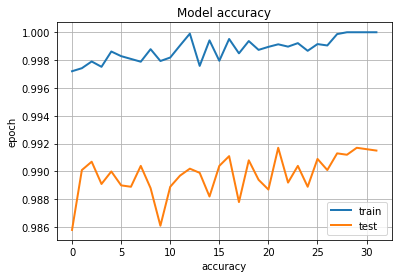

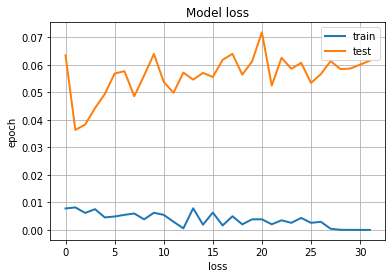

In [56]:
plt.figure()
plt.grid()
plt.plot(hist.history['accuracy'],lw=2)
plt.plot(hist.history['val_accuracy'],lw=2)
plt.title('Model accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train','test'])
plt.show()

plt.figure()
plt.grid()
plt.plot(hist.history['loss'],lw=2)
plt.plot(hist.history['val_loss'],lw=2)
plt.title('Model loss')
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train','test'])
plt.show()

In [57]:
ypred = model.predict(xtest)

y_pred = np.argmax(ypred,axis=1)
y_test = np.argmax(ytest,axis=1)

print('\nMétricas: \n', classification_report(y_test,y_pred));

print('Matriz de confusión: \n', confusion_matrix(y_test,y_pred))


Métricas: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Matriz de confusión: 
 [[ 977    0    0    0    0    0    1    1    1    0]
 [   0 1131    1    1    0    0    0    1    1    0]
 [   2    2 1023    0    1    0    0    3    1    0]
 [   1    1    0 1002    0    4    0    0    2

In [58]:
#model.save('Model_mnist_2.h5')
model = keras.models.load_model('Model_mnist_2.h5')

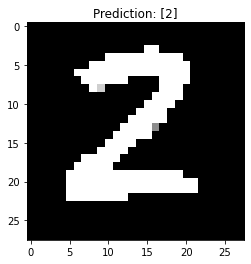

In [60]:
img = cv2.imread('2.jpg')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

th, img_bn = cv2.threshold(img_gray,100,255,cv2.THRESH_BINARY_INV)
img_bn = cv2.resize(img_bn,(28,28))

patron = img_bn.reshape(1,28,28,1)/255

pred = model.predict(patron)
num = np.argmax(model.predict(patron),axis=1)

plt.figure()
plt.imshow(patron[0,:,:,0],cmap=plt.cm.gray)
plt.title('Prediction: ' + str(num))
plt.show()